In [3]:
from IPython.display import Image
# 원-핫 벡터의 표현 방법은 각 단어간 유사성을 표현할 수 없음
# 이로 인해 단어의 '의미'를 다차원 공간에 벡터화하는 방법을 찾는데, 이것을 분산표현 이라고 함

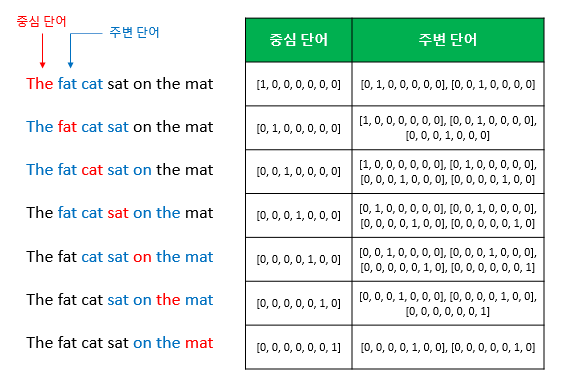

In [4]:
#CBOW - 주변에 있는 단어들을 가지고, 중간에 있는 단어들을 예측하는 방법
#윈도우 사이즈가 2일 때
Image('단어.png')

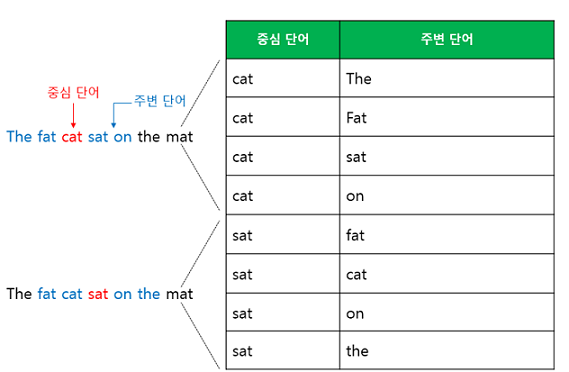

In [5]:
#Skip-Gram 중심 단어에서 주변 단어를 예측하는 방법
#윈도우 사이즈가 2일 때
Image('skipgram_dataset.png')

In [6]:
#영어 Word2Vec 만들기
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:
import urllib.request
import zipfile
from lxml import etree
import re
from nltk.tokenize import word_tokenize, sent_tokenize

In [9]:
# 데이터 다운로드
urllib.request.urlretrieve("https://raw.githubusercontent.com/GaoleMeng/RNN-and-FFNN-textClassification/master/ted_en-20160408.xml", filename="ted_en-20160408.xml")

('ted_en-20160408.xml', <http.client.HTTPMessage at 0x234ebc9a640>)

In [18]:
targetXML=open('ted_en-20160408.xml', 'r', encoding='UTF8')
target_text = etree.parse(targetXML)

# xml 파일로부터 <content>와 </content> 사이의 내용만 가져온다.
parse_text = '\n'.join(target_text.xpath('//content/text()'))

# 정규 표현식의 sub 모듈을 통해 content 중간에 등장하는 (Audio), (Laughter) 등의 배경음 부분을 제거.
# 해당 코드는 괄호로 구성된 내용을 제거.
content_text = re.sub(r'\([^)]*\)', '', parse_text)

# 입력 코퍼스에 대해서 NLTK를 이용하여 문장 토큰화를 수행.
sent_text = sent_tokenize(content_text)

# 각 문장에 대해서 구두점을 제거하고, 대문자를 소문자로 변환.
normalized_text = []
for string in sent_text:
     tokens = re.sub(r"[^a-z0-9]+", " ", string.lower())
     normalized_text.append(tokens)

# 각 문장에 대해서 NLTK를 이용하여 단어 토큰화를 수행.
result = [word_tokenize(sentence) for sentence in normalized_text]

In [19]:
print('총 샘플의 개수 : {}'.format(len(result)))

총 샘플의 개수 : 273424


In [20]:
for line in result[:3]:
    print(line)
#샘플 3개만 출력

['here', 'are', 'two', 'reasons', 'companies', 'fail', 'they', 'only', 'do', 'more', 'of', 'the', 'same', 'or', 'they', 'only', 'do', 'what', 's', 'new']
['to', 'me', 'the', 'real', 'real', 'solution', 'to', 'quality', 'growth', 'is', 'figuring', 'out', 'the', 'balance', 'between', 'two', 'activities', 'exploration', 'and', 'exploitation']
['both', 'are', 'necessary', 'but', 'it', 'can', 'be', 'too', 'much', 'of', 'a', 'good', 'thing']


In [22]:
# Word2Vec 훈련
from gensim.models import Word2Vec
model = Word2Vec(sentences=result, vector_size=100, window=5, min_count=5, workers=4, sg=0)
# size : 워드 벡터의 특징 값, 즉 임베팅 된 벡터의 차원
# window : 컨텍스트 윈도우 크기
# min_count : 단어 최소 빈도 수 제한(빈도가 적은 단어들은 학습하지 않음)
# workers : 학습을 위한 프로세스 수
# sg : 0은 CBOW, 1은 Skip-gram

In [23]:
model_result = model.wv.most_similar('man') # 입력한 단어에 대해 가장 유사한 단어 출력
print(model_result)

[('woman', 0.8482061624526978), ('guy', 0.8236470818519592), ('lady', 0.777090847492218), ('boy', 0.7633978724479675), ('girl', 0.7424095869064331), ('gentleman', 0.7180051803588867), ('soldier', 0.7079269289970398), ('kid', 0.7041226029396057), ('poet', 0.6920545697212219), ('photographer', 0.6618497371673584)]


In [24]:
# Word2Vec 모델 저장하고 로드하기
from gensim.models import KeyedVectors
model.wv.save_word2vec_format('eng_w2v')
loaded_model = KeyedVectors.load_word2vec_format('eng_w2v')

In [25]:
# 로드한 모델에 대해 다시 단어 출력
model_result = model.wv.most_similar('man') # 입력한 단어에 대해 가장 유사한 단어 출력
print(model_result)

[('woman', 0.8482061624526978), ('guy', 0.8236470818519592), ('lady', 0.777090847492218), ('boy', 0.7633978724479675), ('girl', 0.7424095869064331), ('gentleman', 0.7180051803588867), ('soldier', 0.7079269289970398), ('kid', 0.7041226029396057), ('poet', 0.6920545697212219), ('photographer', 0.6618497371673584)]


In [26]:
# 한국어 Word2Vec 만들기
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

In [27]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")

('ratings.txt', <http.client.HTTPMessage at 0x235481da2e0>)

In [57]:
train_data = pd.read_table('ratings.txt')
train_data[:5]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [29]:
print(len(train_data)) # 리뷰 개수 출력

200000


In [30]:
# NULL 값 존재 유무
print(train_data.isnull().values.any())

True


In [58]:
train_data = train_data.dropna(how='any') # Null 값이 존재하는 행 제거
print(train_data.isnull().values.any())

False


,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [59]:
print(len(train_data)) # 리뷰 개수 출력

199992


,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [60]:
# 정규 표현식을 통한 한글 외 문자 제거
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","", regex=True)

In [61]:
train_data[:5]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,디자인을 배우는 학생으로 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업...,1
2,4655635,폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 최고,1
3,9251303,와 연기가 진짜 개쩔구나 지루할거라고 생각했는데 몰입해서 봤다 그래 이런게 진짜 영화지,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화,1


In [62]:
# 불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [66]:
# 형태소 분석기 OKT를 통한 토큰화 작업
okt = Okt()
tokenized_data = []
for sentence in train_data['document']:
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    tokenized_data.append(temp_X)

리뷰의 최대 길이 : 72
리뷰의 평균 길이 : 10.716703668146726


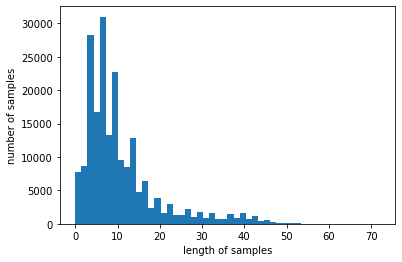

In [68]:
# 리뷰 길이 분포 확인
print('리뷰의 최대 길이 :',max(len(l) for l in tokenized_data))
print('리뷰의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(s) for s in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [70]:
from gensim.models import Word2Vec
model = Word2Vec(sentences= tokenized_data, vector_size=100,window=5,min_count=5,workers=4,sg=0)
model.wv.vectors.shape

(16477, 100)

In [122]:
print(model.wv.most_similar('인공'))

[('대머리', 0.8134282827377319), ('젓다', 0.811888575553894), ('반짝반짝', 0.807106614112854), ('관세음보살', 0.7934524416923523), ('벨루치', 0.790892481803894), ('황신혜', 0.7882318496704102), ('무뇌아', 0.7868655323982239), ('마리아', 0.7838473320007324), ('본드걸', 0.7814352512359619), ('모니카', 0.781272292137146)]


In [ ]:
# 한국어 Word2Vec 만들기(위키피디아)
